## Dataset Preparation

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_words = 10000  # Use the top 10,000 most frequent words
max_len = 100      # Maximum length of a review (truncate/pad)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure all reviews are the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (25000, 100)
Testing Data Shape: (25000, 100)


## Build the RNN Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Build the RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),  # Word embeddings
    SimpleRNN(64, activation='tanh'),  # RNN layer
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [3]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.6314 - loss: 0.6121 - val_accuracy: 0.8270 - val_loss: 0.3933
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8760 - loss: 0.3034 - val_accuracy: 0.8327 - val_loss: 0.4104
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9466 - loss: 0.1472 - val_accuracy: 0.8108 - val_loss: 0.5209
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.7963 - val_loss: 0.6494
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9774 - loss: 0.0671 - val_accuracy: 0.8034 - val_loss: 0.8078


## Evaluate the Model

In [4]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8011 - loss: 0.8158
Test Accuracy: 0.80


## Visualize Training Performance

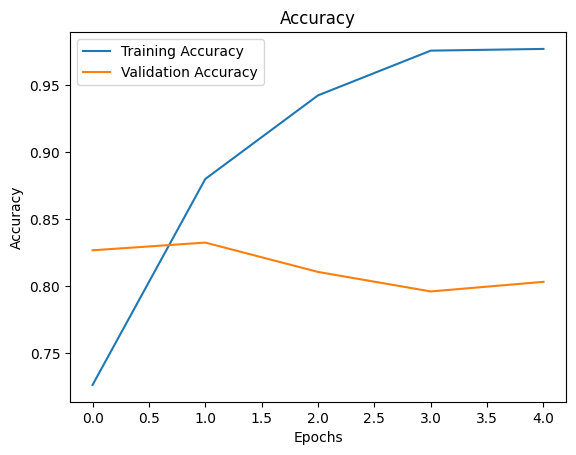

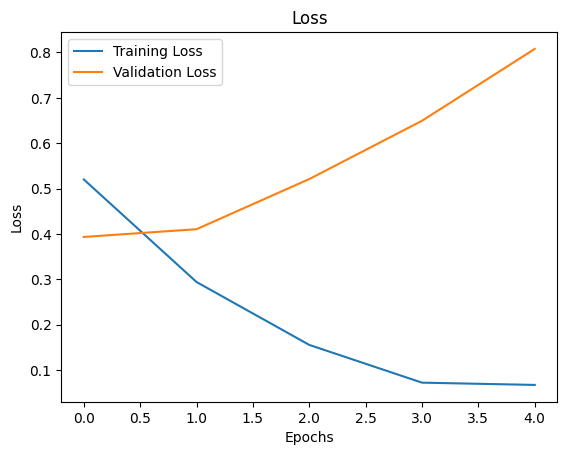

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Make Predictions

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer with the same vocabulary size used for the dataset
tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(["The movie was fantastic", "It was a terrible experience"])

In [15]:
# Define a function to preprocess and predict sentiment
def predict_sentiment(review, model, tokenizer):
    # Tokenize and pad the review
    encoded_review = tokenizer.texts_to_sequences([review])
    padded_review = pad_sequences(encoded_review, maxlen=max_len)

    # Predict sentiment
    prediction = model.predict(padded_review)
    return "Positive" if prediction > 0.5 else "Negative"

# Example reviews
new_review_1 = "The movie was fantastic! I really loved it."
new_review_2 = "It was a terrible experience. I hated it."

print(predict_sentiment(new_review_1, model, tokenizer))
print(predict_sentiment(new_review_2, model, tokenizer))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Positive
